In [1]:
# Loading fast.ai course v3 requestments
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
spacy 2.0.18 has requirement numpy>=1.15.0, but you'll have numpy 1.14.6 which is incompatible.
Done.


# Lesson 1 - What's your pet

In [0]:
# Import libraries ans setup

%reload_ext autoreload
%autoreload 2
%matplotlib inline

from fastai.vision import *
from fastai.metrics import *

In [0]:
# Setup batch size
bs = 32
# bs = 16 # Uncomment this line if you run out of memory even after restarting Kernel

## Looking at the data

In [4]:
path = untar_data(URLs.PETS)
path

PosixPath('/root/.fastai/data/oxford-iiit-pet')

In [5]:
path.ls()

[PosixPath('/root/.fastai/data/oxford-iiit-pet/annotations'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images')]

In [0]:
path_annotations = path/"annotations"
path_images = path/"images"

In [7]:
file_names = get_image_files(path_images)
file_names[:5]

[PosixPath('/root/.fastai/data/oxford-iiit-pet/images/havanese_82.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/english_cocker_spaniel_134.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Abyssinian_93.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/pomeranian_30.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Ragdoll_188.jpg')]

In [0]:
pattern = r'/([^/]+)_\d+.jpg$'

In [9]:
help(ImageDataBunch.from_name_re)

data = ImageDataBunch.from_name_re(path_images, 
                                   file_names, 
                                   pattern, 
                                   ds_tfms=get_transforms(), 
                                   size=244, 
                                   bs=bs).normalize(imagenet_stats)

Help on method from_name_re in module fastai.vision.data:

from_name_re(path:Union[pathlib.Path, str], fnames:Collection[pathlib.Path], pat:str, valid_pct:float=0.2, **kwargs) method of builtins.type instance
    Create from list of `fnames` in `path` with re expression `pat`.



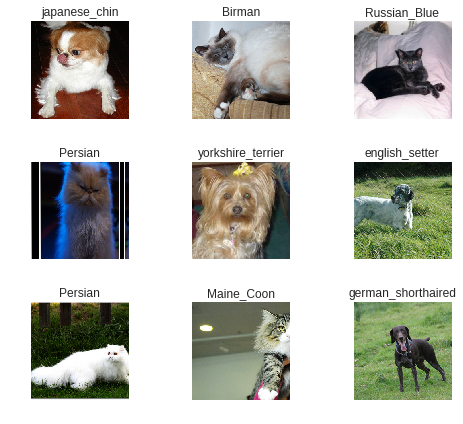

In [10]:
data.show_batch(rows=3, figsize=(7, 6))

In [11]:
print(data.classes)
print(len(data.classes))
print(data.c)

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']
37
37


## Training: resnet34

In [12]:
help(create_cnn)

Help on function create_cnn in module fastai.vision.learner:

create_cnn(data:fastai.basic_data.DataBunch, arch:Callable, cut:Union[int, Callable]=None, pretrained:bool=True, lin_ftrs:Union[Collection[int], NoneType]=None, ps:Union[float, Collection[float]]=0.5, custom_head:Union[torch.nn.modules.module.Module, NoneType]=None, split_on:Union[Callable, Collection[Collection[torch.nn.modules.module.Module]], NoneType]=None, bn_final:bool=False, **learn_kwargs:Any) -> fastai.basic_train.Learner
    Build convnet style learners.



In [13]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.torch/models/resnet34-333f7ec4.pth
87306240it [00:00, 96124105.08it/s]


In [14]:
# Show model architecture
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

In [15]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate
1,0.905150,0.311518,0.100812
2,0.462142,0.242688,0.071719
3,0.346022,0.222900,0.069689
4,0.234771,0.205445,0.064276


In [0]:
# Store model
learn.save("stage-1")

## Results

In [17]:
interp = ClassificationInterpretation.from_learner(learn)
losses, idxs = interp.top_losses()
len(data.valid_ds) == len(losses) == len(idxs)

True

Help on method _cl_int_plot_top_losses in module fastai.vision.learner:

_cl_int_plot_top_losses(k, largest=True, figsize=(12, 12), heatmap:bool=True) method of fastai.train.ClassificationInterpretation instance
    Show images in `top_losses` along with their prediction, actual, loss, and probability of predicted class.



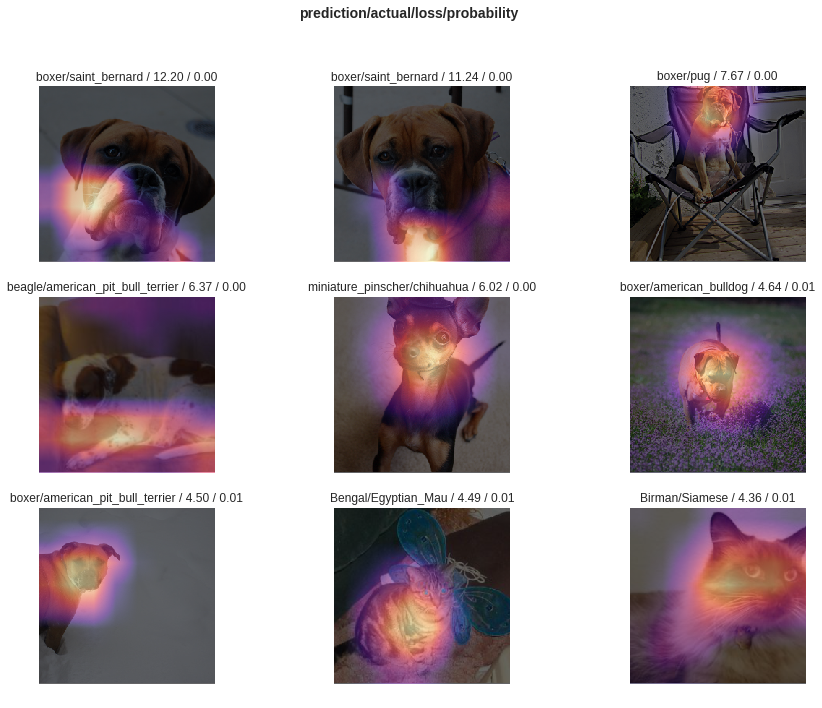

In [18]:
help(interp.plot_top_losses)
interp.plot_top_losses(9, figsize=(15, 11))

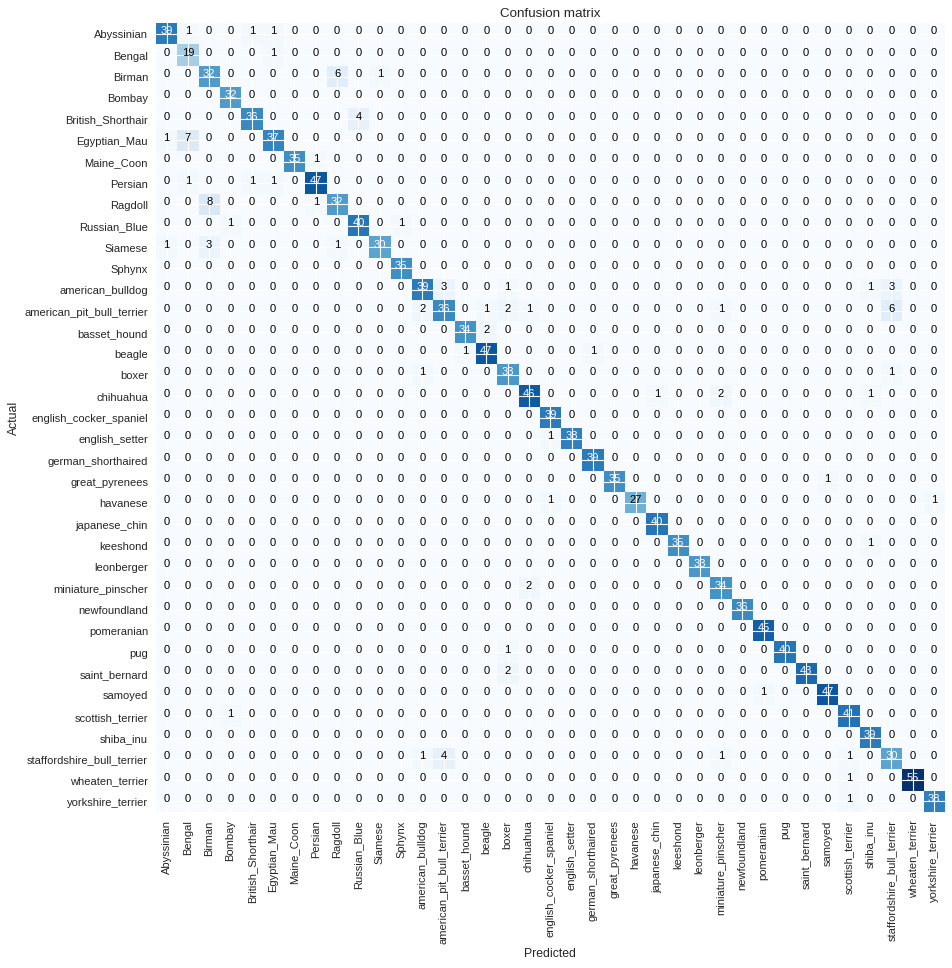

In [19]:
interp.plot_confusion_matrix(figsize=(12, 12), dpi=80)

In [20]:
interp.most_confused(min_val=2)

[('Ragdoll', 'Birman', 8),
 ('Egyptian_Mau', 'Bengal', 7),
 ('Birman', 'Ragdoll', 6),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 6),
 ('British_Shorthair', 'Russian_Blue', 4),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 4),
 ('Siamese', 'Birman', 3),
 ('american_bulldog', 'american_pit_bull_terrier', 3),
 ('american_bulldog', 'staffordshire_bull_terrier', 3)]

In [21]:
help(learn.unfreeze)

Help on method unfreeze in module fastai.basic_train:

unfreeze() method of fastai.basic_train.Learner instance
    Unfreeze entire model.



In [0]:
learn.unfreeze()

In [23]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate
1,0.658883,0.340974,0.102842


In [24]:
learn.load("stage-1")

Learner(data=ImageDataBunch;

Train: LabelList (5912 items)
x: ImageItemList
Image (3, 244, 244),Image (3, 244, 244),Image (3, 244, 244),Image (3, 244, 244),Image (3, 244, 244)
y: CategoryList
havanese,english_cocker_spaniel,pomeranian,Ragdoll,american_bulldog
Path: /root/.fastai/data/oxford-iiit-pet/images;

Valid: LabelList (1478 items)
x: ImageItemList
Image (3, 244, 244),Image (3, 244, 244),Image (3, 244, 244),Image (3, 244, 244),Image (3, 244, 244)
y: CategoryList
boxer,basset_hound,english_setter,american_bulldog,german_shorthaired
Path: /root/.fastai/data/oxford-iiit-pet/images;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64,

In [25]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 2.29E-06


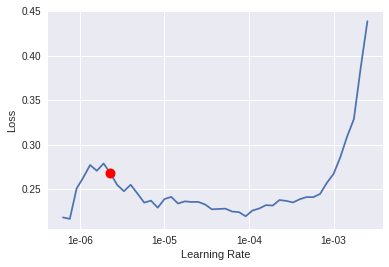

In [26]:
learn.recorder.plot()

In [27]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-6, 1e-4))

epoch,train_loss,valid_loss,error_rate
1,0.230054,0.197911,0.064953
2,0.218892,0.190065,0.054804


## Training: resnet50

In [0]:
data = ImageDataBunch.from_name_re(path_images, 
                                   file_names, 
                                   pattern, 
                                   ds_tfms=get_transforms(), 
                                   size=299, 
                                   bs=bs//2
                                  ).normalize(imagenet_stats)

In [29]:
learn = create_cnn(data, arch=models.resnet50, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.torch/models/resnet50-19c8e357.pth
102502400it [00:01, 81377196.42it/s]


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 3.02E-03


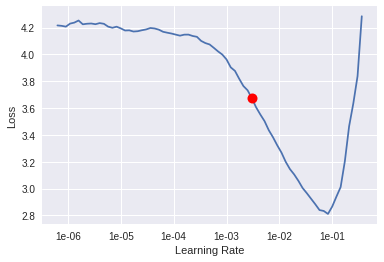

In [30]:
learn.lr_find()
learn.recorder.plot()

In [31]:
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,error_rate
1,0.642805,0.274313,0.092016
2,0.474831,0.276454,0.089986
3,0.460411,0.219676,0.075101
4,0.337346,0.217339,0.069012
5,0.263237,0.189883,0.060893
6,0.200230,0.153063,0.048038
7,0.149945,0.148264,0.049391
8,0.164495,0.145669,0.049391


In [0]:
learn.save("stage-1-50")

In [44]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 6.31E-07


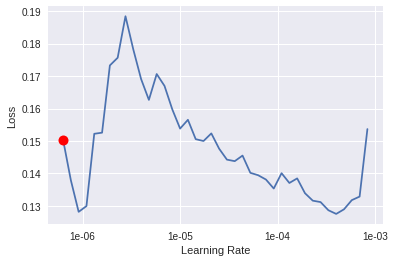

In [45]:
learn.recorder.plot()

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

In [35]:
interp.most_confused(min_val=2)

[('Ragdoll', 'Birman', 8),
 ('Siamese', 'Birman', 5),
 ('Birman', 'Ragdoll', 4),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 4),
 ('beagle', 'basset_hound', 4),
 ('miniature_pinscher', 'american_pit_bull_terrier', 4),
 ('Egyptian_Mau', 'Bengal', 3)]

In [36]:
learn.unfreeze()
learn.fit_one_cycle(3, max_lr=slice(1e-6, 1e-4))

epoch,train_loss,valid_loss,error_rate
1,0.162189,0.148979,0.048038
2,0.139928,0.149936,0.045332
3,0.138974,0.149235,0.043978


In [0]:
learn.save("stage-1-50_v2")

In [39]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 5.75E-06


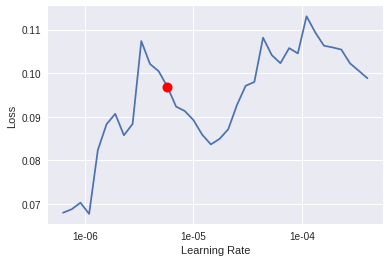

In [40]:
learn.recorder.plot()

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

In [42]:
interp.most_confused(min_val=2)

[('Ragdoll', 'Birman', 9),
 ('Bengal', 'Abyssinian', 4),
 ('miniature_pinscher', 'american_pit_bull_terrier', 4),
 ('Egyptian_Mau', 'Bengal', 3),
 ('Siamese', 'Birman', 3),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 3)]